In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from itertools import cycle
from sklearn.linear_model import lasso_path
plt.rcParams.update({'font.size': 15})

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [47]:
A_initial=np.random.normal(0,1,(20,40))
def normalize(a=A_initial):
    'making the l2 norm of columns equal to 1'
    normalized_a=[]
    for i in range(0,len(a[0])):
        temp=preprocessing.normalize([a[:,i]])
        normalized_a.append(temp[0])        
    return np.array(normalized_a).T

In [48]:
def sparseX(lower_limit=0,upper_limit=40,size=10):
    'creating the sparse matrix x*'
    indices=np.random.randint(lower_limit,upper_limit,size=size,dtype='l')
    values=np.random.normal(0,1/(np.sqrt(10)),(10,)) # is the mean supposed to be zero?
    x_sparse=np.zeros(40,)
    x_sparse[indices]=values
    x_sparse=np.abs(x_sparse)
    return x_sparse

In [49]:
A=normalize()
x_sparse=sparseX()
y=np.matmul(A,x_sparse)
X=A
eps=1e-3 # should the value of eps be changed?

In [50]:
def lassoPathPlot(X,y,coef_init,eps=eps):
    alphas,coefs,dual_gaps,n_iters=lasso_path(X, # it says X (which is A here) has to be sparse! Why so?
                                              y,
                                              eps,
                                             coef_init=coef_init,
                                             fit_intercept=False,
                                             return_n_iter=True,
                                             positive=True)
    colors = cycle(['b', 'r', 'g', 'c', 'k'])
    neg_log_alphas = -np.log10(alphas)
    for coef, color in zip(coefs, colors):
        l1 = plt.plot(neg_log_alphas, coef, c=color)    
    plt.xlabel('-$\log_{10}$($\lambda$)')
    plt.ylabel('Coefficients')
    plt.title('Lasso')
    plt.axis('tight')
    plt.ylim(-0.05,.55)

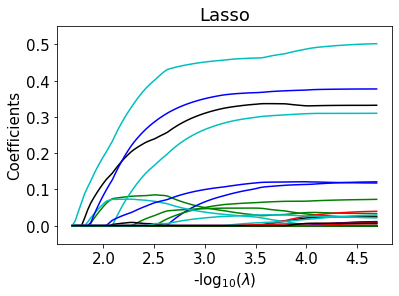

In [51]:
lassoPathPlot(A,y,x_sparse)

In [58]:
'For gradient descent'

X_GD = tf.placeholder(tf.float64, shape =(40,20), name = 'X_GD' ) #Place holder for data X
y_GD = tf.placeholder(tf.float64, shape =(20, None), name = 'y_GD' ) #Place holder for y
w = tf.Variable(x_sparse,name='w')#tf.random_normal([40,], 0, np.sqrt(1/D), seed=42), name='V')

#operations
temp=np.array(w)
temp1=temp*temp
y_new=tf.matmul([temp1],X_GD) # shape (1,20)
y_new=tf.reshape(y_new,(20,))
difference=y_GD-y_new

#loss = tf.nn.l2_loss(difference)
loss=tf.nn.l2_loss(w)
learning_rate = 1e-3
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_objective = optimizer.minimize(loss)

init = tf.initialize_all_variables()
iterations=300000
def optimize():
    x_values=[]
    with tf.Session() as session:
        session.run(init)
        #print("starting at", "x:", session.run(w))#, "log(x)^2:", session.run(log_x_squared))
      
        for step in range(iterations):
            session.run(training_objective)
            if step%10==1:
                temp=(session.run(w))
                temp1=w.eval()
                x_values.append(temp1)
            #print("step", step, "x:", session.run(w))#, "log(x)^2:", session.run(log_x_squared))
            
    return np.array(x_values).T

x_values=optimize()            

In [62]:
def GDPathPlot(iteration=iteration,x_values=x_values):
    
    iteration=np.arange(10,iterations+10,10)
    for i in range(len(x_values)):
        plt.plot(iteration/1000,x_values[i])
    plt.xlabel('Thousand steps')
    plt.title('GD')
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.ylim(-0.05,0.55)


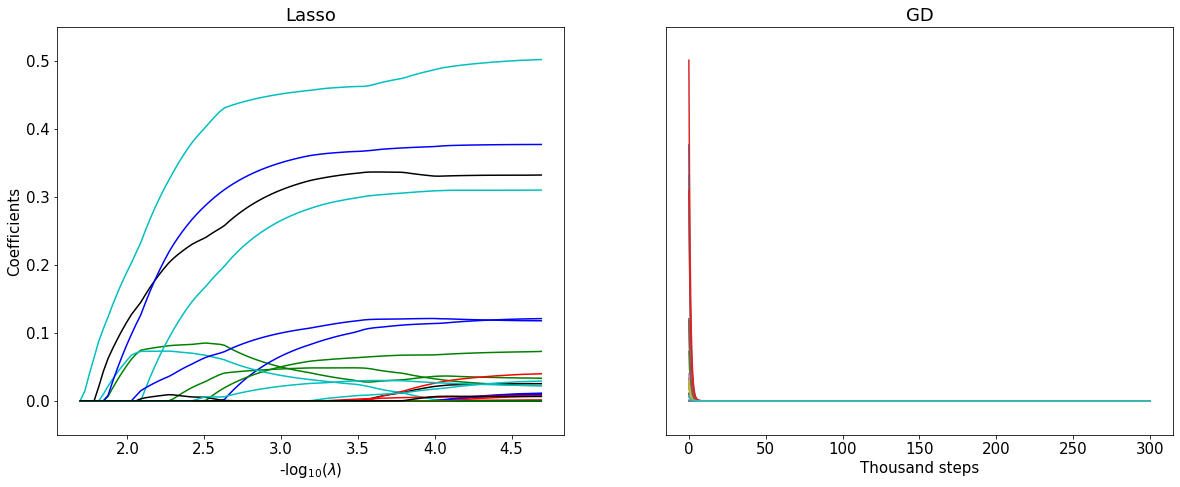

In [63]:
fig,axes=plt.subplots(1,2,figsize=(20,7.5))
plt.subplot(1,2,1)
lassoPathPlot(A,y,x_sparse)
plt.subplot(1,2,2)
GDPathPlot()# change this